# Explore surface CREG025.L75 experiment to assess the AW subduction 
>> ## It refers to NetCDF files produced with AWSubduction_QtIceAWTmaxClim.ipynb script

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import CREG_maps_func as cregmap
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from netCDF4 import Dataset

%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def box_plot(Tgt_box,mplot):
    # Now clearly identify the area corresponding to the FraWSC box selected above
    for i in set(np.arange(Tgt_box.shape[1],step=2)) :
        for j in set(np.arange(Tgt_box.shape[0],step=2)) :
            if not np.isnan(Tgt_box.values[j,i]) :
                X,Y = mplot(Tgt_box.glamt.values[j,i],Tgt_box.gphit.values[j,i])
                mplot.scatter(X,Y, s=5., marker='o', color='k', alpha=0.7)


In [3]:
s_year=1980 ; e_year=2015

RYEAR=str(s_year)+'-'+str(e_year)

In [4]:
CONFIG='CREG025.L75'   ; CASE=''
CONFCASE=CONFIG

In [5]:
# List of experiments names:
CASE='BCTGE27NTMX'   #; CASE='BVHNTMXP'  ;  CASE='BVHNTMXD' ; CASE='BCTGE27NTMX'

##### Read CREG025.L75 grid information 

In [6]:
main_dir='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'
grid_dir=main_dir+CONFIG+'/GRID/'

# Mask of the grid
ds_mask=xr.open_dataset(grid_dir+CONFCASE+'_byte_mask.nc')
ds_mask

# Horizontal mesh
ds_mesh_hgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_hgr.nc')
ds_mesh_hgr

# Vertical mesh
ds_mesh_zgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_zgr.nc')
ds_mesh_zgr

# Bathymetry
ds_bathy=xr.open_dataset(grid_dir+'CREG025_bathy_etopo1_gebco1_smoothed_coast_corrected_bering_may11_time_vh20161220.nc')
ds_bathy

fieldbat=Dataset(grid_dir+'CREG025_bathy_etopo1_gebco1_smoothed_coast_corrected_bering_may11_time_vh20161220.nc')
lon=np.squeeze(fieldbat.variables['nav_lon'])
lat=np.squeeze(fieldbat.variables['nav_lat'])
#ds_bathy['Bathymetry']= xr.where(ds_bathy['Bathymetry'] <= 0.,ds_bathy['Bathymetry'])

In [7]:
ds_grid=xr.Dataset()
ds_grid
#ds_grid['tmask2D']=(('time','z','y','x'),ds_mask['tmask'])
ds_grid['Tarea']=ds_mask['tmask'][0,0,:,:]*ds_mesh_hgr['e1t'][0,:,:]*ds_mesh_hgr['e2t'][0,:,:]
ds_grid['Farea']=ds_mask['fmask'][0,0,:,:]*ds_mesh_hgr['e1f'][0,:,:]*ds_mesh_hgr['e2f'][0,:,:]
ds_grid['tmask2D']=ds_mask['tmask'].sel(z=0).squeeze()
ds_grid.coords['gphif']=(('y','x'),ds_mesh_hgr['gphif'][0,:,:])
ds_grid.coords['glamf']=(('y','x'),ds_mesh_hgr['glamf'][0,:,:])
ds_grid.coords['gphit']=(('y','x'),ds_mesh_hgr['gphit'][0,:,:])
ds_grid.coords['glamt']=(('y','x'),ds_mesh_hgr['glamt'][0,:,:])
ds_grid['Bathymetry']=(('y','x'),ds_bathy['Bathymetry'])
ds_grid['lon']=(('y','x'),ds_bathy['nav_lon'])
ds_grid['lat']=(('y','x'),ds_bathy['nav_lat'])

ds_grid

#plt.imshow(ds_grid['Farea'],origin='bottom')

<xarray.Dataset>
Dimensions:     (x: 528, y: 603)
Coordinates:
    gphif       (y, x) float32 25.4716 25.471653 ... 55.095528 55.02518
    glamf       (y, x) float32 -93.62534 -93.37534 ... 102.25591 102.051285
    gphit       (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
    glamt       (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
Dimensions without coordinates: x, y
Data variables:
    Tarea       (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Farea       (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tmask2D     (y, x) int8 ...
    Bathymetry  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon         (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
    lat         (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175

#### Define the WSC box limited to the Fram strait at its northern edge

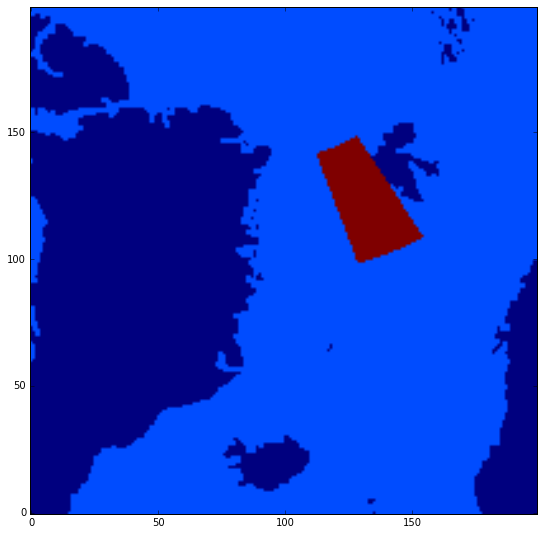

In [8]:
# Identify the area with boolean 
FraWSC_msk=(ds_grid.coords['gphit']>75.)&(ds_grid.coords['gphit']<81.)& \
        (ds_grid.coords['glamt']>0.) & (ds_grid.coords['glamt']<13.)

# Then define a mask with either 0 or 1 values
ds_grid['FraWSC_msk']=xr.where(FraWSC_msk,1.,0.)

# Exactly the same as above but create a DataArray instead 
# used to reduce the area corresponding to the box
aze=xr.where(FraWSC_msk,1.,0.)
FraWSC_mskReduce=aze.where(ds_grid['FraWSC_msk']==1,drop=True)

ds_grid
# Control the location of the mask
plt.figure(figsize=(20,10))
#plt.subplot(121)
#plt.imshow(NorSeas_msk,origin='botom')
plt.subplot(122)
ds_grid['FraWSC_loc']=xr.where(FraWSC_msk,5.,ds_grid['tmask2D'][:,:])
plt.imshow(ds_grid['FraWSC_loc'][200:400,200:400],origin='botom')



>>> 

# READ Surface net Heat fluxes & AW max T°  

In [9]:
!date

Fri Jan 18 13:29:55 UTC 2019


In [10]:
# Ref experiment data
ds_EXP=xr.open_dataset('./NETCDF/'+CASE+'_y'+RYEAR+'_ClimSeas_Qt_AWTmax_IceConc.nc',autoclose=True)
monthly_time=pd.date_range(start=str(s_year)+'-01-01',end=str(e_year)+'-12-31',freq='M')


In [11]:
!date

Fri Jan 18 13:29:55 UTC 2019


In [12]:
ds_EXP

<xarray.Dataset>
Dimensions:             (month: 12, x: 528, y: 603)
Dimensions without coordinates: month, x, y
Data variables:
    ds_RefQ_seas        (month, y, x) float32 ...
    ds_RefQ_seas_JFM    (y, x) float32 ...
    ds_RefQ_seas_JAS    (y, x) float32 ...
    ds_RefIce_seas      (month, y, x) float32 ...
    ds_RefIce_seas_JFM  (y, x) float32 ...
    ds_RefIce_seas_JAS  (y, x) float32 ...
    ds_AWT_seas         (month, y, x) float32 ...
    ds_AWT_seas_JFM     (y, x) float32 ...
    ds_AWT_seas_JAS     (y, x) float32 ...

>>>> ### Plot the JFM mean period 

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


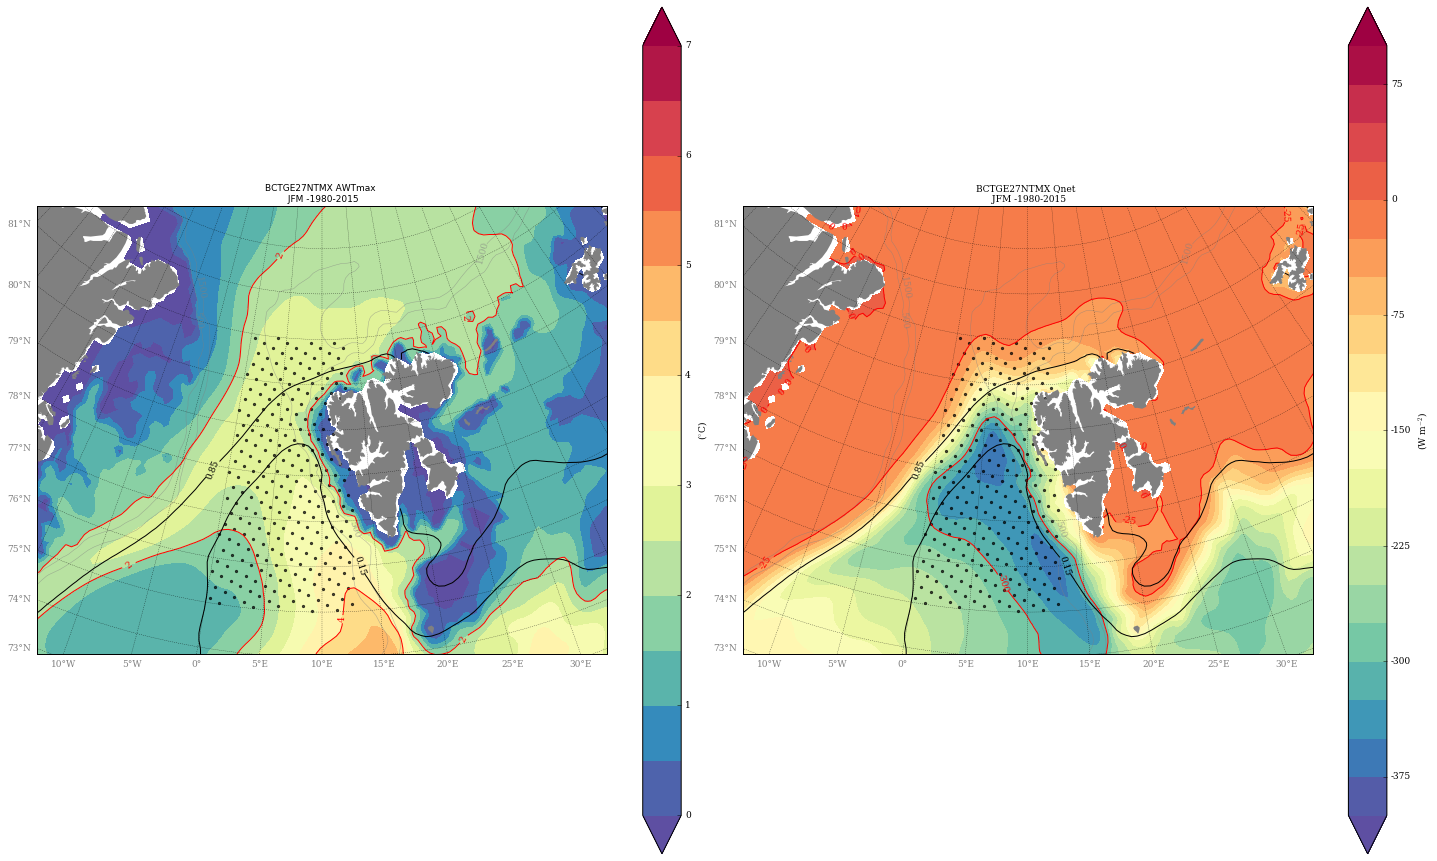

In [13]:
plt.figure(figsize=(20,15))

# AWTmax 
vmin=0. ; vmax=7. ; vint=0.5
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      

plt.subplot(121)
M=cregmap.WSC_plot(lon,lat,ds_EXP['ds_AWT_seas_JFM'],ds_EXP['ds_RefIce_seas_JFM'],ds_grid,contours,limits, \
                   name=CASE+' AWTmax \n JFM -'+RYEAR,zmy_cblab=r'($^{\circ}$C)',zvar='Temp',zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

# Surface heat fluxes
vmin=-400. ; vmax=100. ; vint=25.
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      
plt.subplot(122)
M=cregmap.WSC_plot(lon,lat,ds_EXP['ds_RefQ_seas_JFM'],ds_EXP['ds_RefIce_seas_JFM'],ds_grid,contours,limits, \
                   name=CASE+' Qnet \n JFM -'+RYEAR,zmy_cblab=r'(W m$^{-2}$)',zvar='Qnet',zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

plt.tight_layout()

dosave=False
if dosave : plt.savefig(CASE+'_y'+RYEAR+'_BOXQnet-AWTmax_JFM.pdf',dpi=100)
dosave=False

>>>> ### Plot the JAS mean period 

/usr/lib/python2.7/dist-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


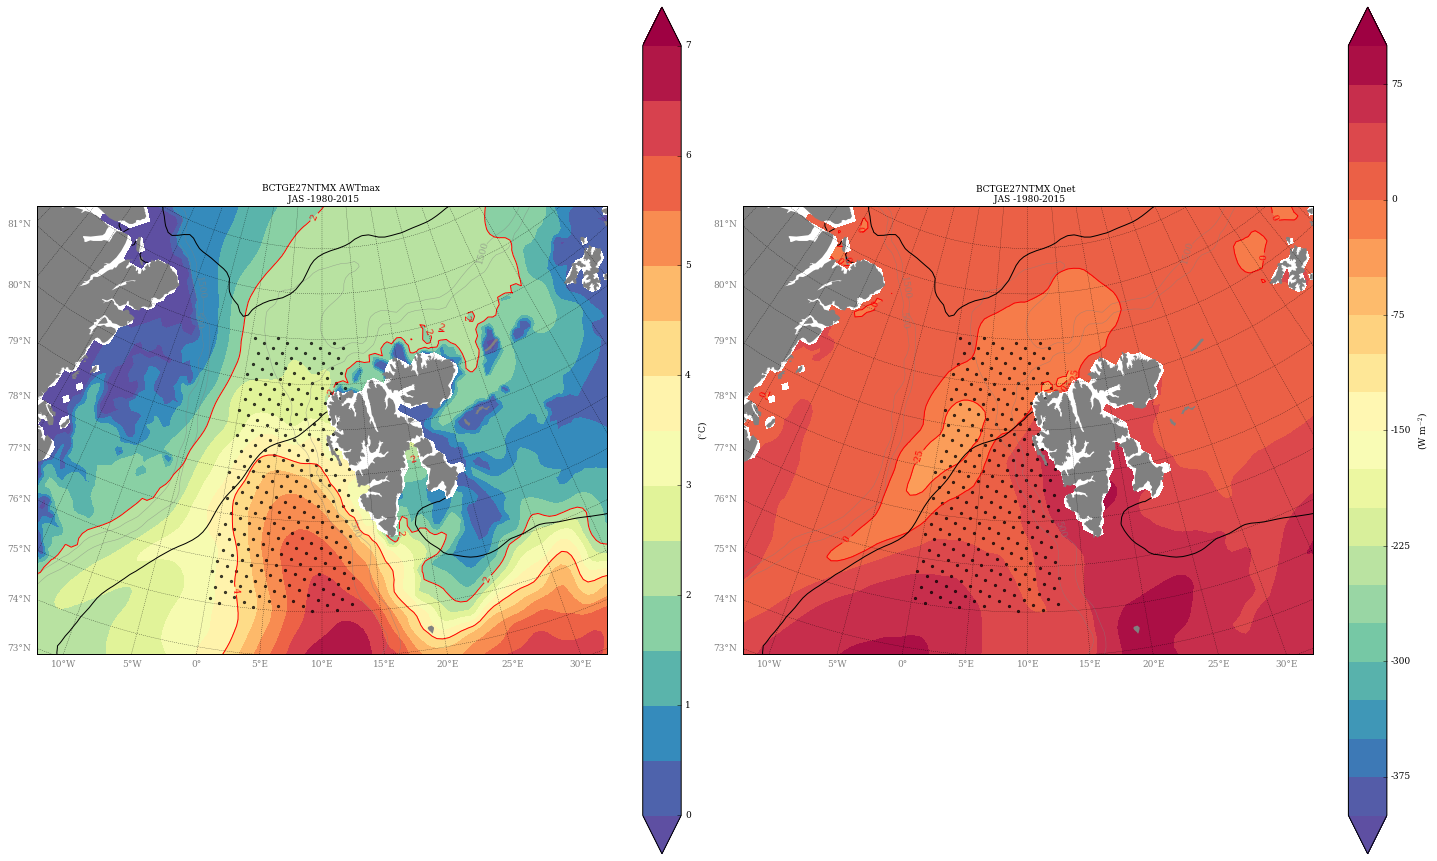

In [14]:
plt.figure(figsize=(20,15))

# AWTmax 
vmin=0. ; vmax=7. ; vint=0.5
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      

plt.subplot(121)
M=cregmap.WSC_plot(lon,lat,ds_EXP['ds_AWT_seas_JAS'],ds_EXP['ds_RefIce_seas_JAS'],ds_grid,contours,limits, \
                   name=CASE+' AWTmax \n JAS -'+RYEAR,zmy_cblab=r'($^{\circ}$C)',zvar='Temp',zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

# Surface heat fluxes
vmin=-400. ; vmax=100. ; vint=25.
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      
plt.subplot(122)
M=cregmap.WSC_plot(lon,lat,ds_EXP['ds_RefQ_seas_JAS'],ds_EXP['ds_RefIce_seas_JAS'],ds_grid,contours,limits, \
                   name=CASE+' Qnet \n JAS -'+RYEAR,zmy_cblab=r'(W m$^{-2}$)',zvar='Qnet',zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

plt.tight_layout()

dosave=True
if dosave : plt.savefig(CASE+'_y'+RYEAR+'_BOXQnet-AWTmax_JAS.pdf',dpi=100)
dosave=False

>>> # Plots maps of differences 

In [ ]:
# Ref experiment data
EXP1='BVHNTMXD'
ds_EXP1=xr.open_dataset('./NETCDF/'+EXP1+'_y'+RYEAR+'_ClimSeas_Qt_AWTmax_IceConc.nc',autoclose=True)
monthly_time=pd.date_range(start=str(s_year)+'-01-01',end=str(e_year)+'-12-31',freq='M')


In [ ]:
ds_EXP

In [ ]:
plt.figure(figsize=(20,15))

# AWTmax 
vmin=-0.5 ; vmax=0.5 ; vint=0.1
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      

plt.subplot(221)
M=cregmap.WSC_plot(lon,lat,ds_EXP1['ds_AWT_seas_JFM']-ds_EXP['ds_AWT_seas_JFM'],ds_EXP['ds_RefIce_seas_JFM'],ds_grid,contours,limits, \
                   name=EXP1+'-'+CASE+' AWTmax Diff \n JFM -'+RYEAR,zmy_cblab=r'($^{\circ}$C)', \
                   zmy_cmap='coolwarm',zvar='Temp',zdiff=True,zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

# Surface heat fluxes
vmin=-70. ; vmax=70. ; vint=10.
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      
plt.subplot(222)
M=cregmap.WSC_plot(lon,lat,ds_EXP1['ds_RefQ_seas_JFM']-ds_EXP['ds_RefQ_seas_JFM'],ds_EXP['ds_RefIce_seas_JFM'],ds_grid,contours,limits, \
                   name=EXP1+'-'+CASE+' Qnet Diff \n JFM -'+RYEAR,zmy_cblab=r'(W m$^{-2}$)', \
                   zmy_cmap='coolwarm_r',zvar='Qnet',zdiff=True,zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

# Sea-Ice concentration
vmin=-0.5 ; vmax=0.5 ; vint=0.1
contours=np.arange(vmin,vmax+vint,vint)
limits=[vmin,vmax]      
plt.subplot(223)
M=cregmap.WSC_plot(lon,lat,ds_EXP1['ds_RefIce_seas_JFM']-ds_EXP['ds_RefIce_seas_JFM'],ds_EXP['ds_RefIce_seas_JFM'],ds_grid,contours,limits, \
                   name=EXP1+'-'+CASE+' Ice [] Diff \n JFM -'+RYEAR,zmy_cblab=r'(-)', \
                   zmy_cmap='coolwarm',zdiff=True,zarea='S-WSC')
box_plot(FraWSC_mskReduce,M)

plt.tight_layout()

dosave=False
if dosave : plt.savefig(EXP1+'-'+CASE+'_y'+RYEAR+'_BOXQnet-AWTmax_Ice_JFM.pdf',dpi=100)
dosave=False